In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# **Lectura de datos**

Se realiza la lectura de datos, a partir del CSV y se carga a la estructura de datos llamada DataFrame.

In [ ]:
data_admision = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
data_admision.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data_admision.head(8)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68


# **Análisis de datos**
Este paso me lo saltaré pero ustedes saben que se puede hacer facilmente con DTale.

# **Procesamiento de datos**




Se procesa la columna Chance of Admit y de acuerdo a su valor se coloca "yes" o "no".

In [ ]:
data_admision['admision_processed'] = np.where(data_admision['Chance of Admit '] >= 0.6, 'yes', 'no')

In [ ]:
data_admision

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admision_processed
0,1,337,118,4,4.5,4.5,9.65,1,0.92,yes
1,2,324,107,4,4.0,4.5,8.87,1,0.76,yes
2,3,316,104,3,3.0,3.5,8.00,1,0.72,yes
3,4,322,110,3,3.5,2.5,8.67,1,0.80,yes
4,5,314,103,2,2.0,3.0,8.21,0,0.65,yes
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,yes
396,397,325,107,3,3.0,3.5,9.11,1,0.84,yes
397,398,330,116,4,5.0,4.5,9.45,1,0.91,yes
398,399,312,103,3,3.5,4.0,8.78,0,0.67,yes


Se definde las variables predictoras, eliminamos Serial No. dado que es un identificado secuencial que no le aporta nada al ejercicio. Y no tomamos ni Chance of Admit ni admision_processed, dado que: la primera ya no nos sirve, por eso hemos creado admision_processed y esta segunda variable será nuestra variable target u objetivo.

In [ ]:
predictor_variables_list = ['GRE Score', 'TOEFL Score', 'University Rating',
                            'SOP', 'LOR ', 'CGPA', 'Research']
predictor_df =  data_admision[predictor_variables_list]

target_df = data_admision['admision_processed']

In [ ]:
target_df

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
395    yes
396    yes
397    yes
398    yes
399    yes
Name: admision_processed, Length: 400, dtype: object

Se realiza la separación del conjunto de datos, en entrenamiento y prueba.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictor_df, target_df, test_size=0.3, random_state=23)

# **Modelo**

Se define e inicializa el modelo de árbol de decisión, con un random_state igual a cero y una profundidad máxima de 3.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 0, max_depth=3)

Una vez inicializados, se procede a entrenar el modelo de árbol de decisión, con el conjunto de entrenamiento (X_train) y los true label o etiquetas verdaderas asociadas a las instancias de entrenamiento (y_train).

In [ ]:
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# **Graficación del modelo**

Se grafica el modelo de árboles de decisión entrenado.

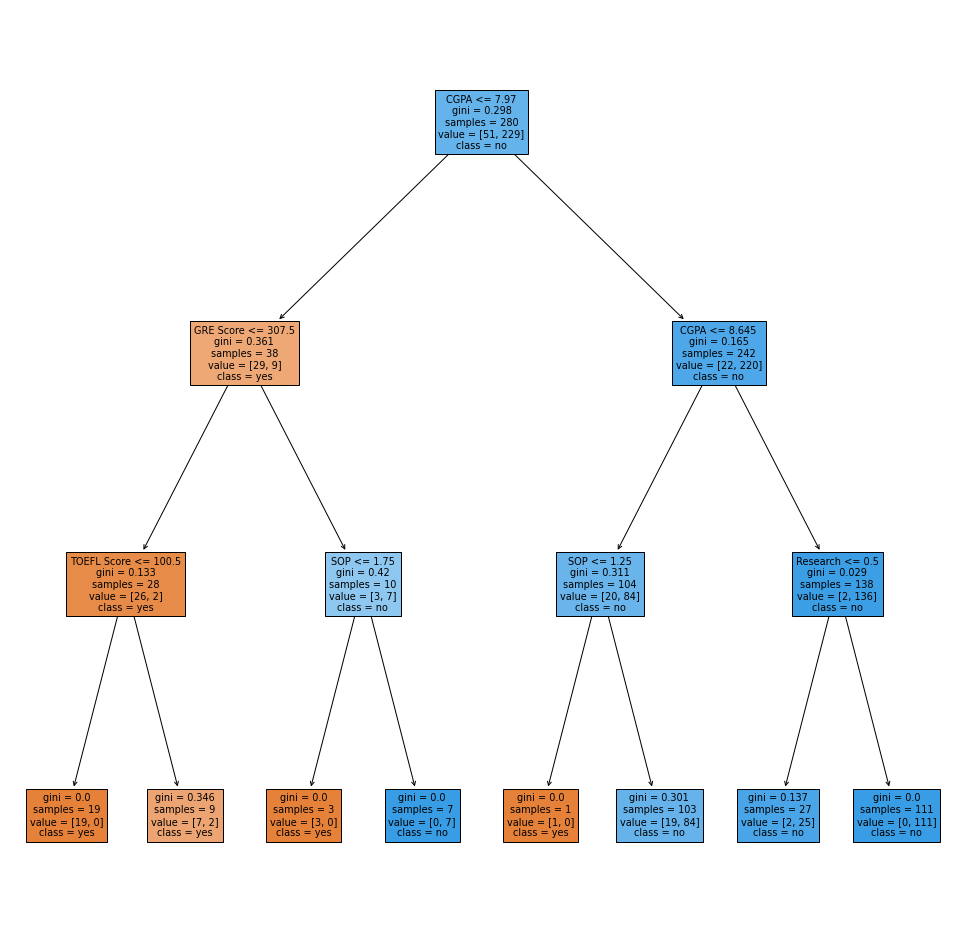

In [ ]:
fn=predictor_variables_list
cn=["yes", "no"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (17,17))
tree.plot_tree(decision_tree_classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# **Evaluación del modelo**

Obtenemos la predicción hecha por el modelo entrenado,a partir del conjunto de datos de prueba.

In [ ]:
predictions = decision_tree_classifier.predict(X_test)
predictions

array(['yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
y_test

133    yes
331    yes
167    yes
335    yes
239     no
      ... 
189    yes
321    yes
165    yes
19     yes
84     yes
Name: admision_processed, Length: 120, dtype: object

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions, average='micro'))
print("Recall:",metrics.recall_score(y_test, predictions, average='micro'))
print("f1_score:",metrics.f1_score(y_test, predictions, average='micro'))
print("Kappa:",metrics.cohen_kappa_score(y_test, predictions))


Accuracy: 0.9166666666666666
Precision: 0.9166666666666666
Recall: 0.9166666666666666
f1_score: 0.9166666666666666
Kappa: 0.7005988023952096


A partir de las métricas anteriores, se puede observar que el modelo entrenado presentar alrededor de una 91.6% de precisión durante su fase de predicción.

In [ ]:
matrix = metrics.confusion_matrix(y_test, predictions)
matrix

array([[15,  7],
       [ 3, 95]])

A partir de la matriz de confusión generada, podemos ver que sobresale la diagonal principal, sin embargo el dataset de test expone que es desbalanceado al tener tan pocas instancias de la primera clase.